In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
# data cleansing
df.director.fillna("No Director", inplace=True)
df.cast.fillna("No Cast", inplace=True)
df.country.fillna("Country Unavailable", inplace=True)
df.dropna(subset=["date_added","rating"], inplace=True)

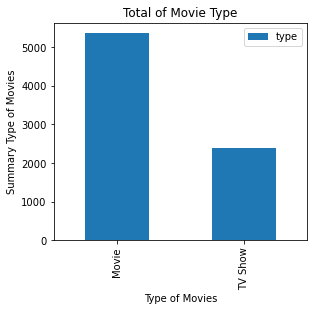

In [4]:
# jumlah film tiap kategori film
plt.figure(figsize = (10,4))

plt.subplot(1,2,1)
df.type.value_counts().plot(kind = 'bar')
plt.gca().set(ylabel = 'Summary Type of Movies', xlabel = 'Type of Movies')
plt.title('Total of Movie Type')
plt.legend()

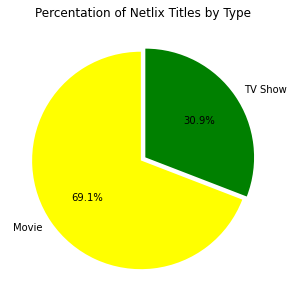

In [5]:
# persentanse kategori film
plt.figure(figsize=(12,5))

plt.title("Percentation of Netlix Titles by Type")
g = plt.pie(df.type.value_counts(), explode=(0.025,0.025),
           labels=df.type.value_counts().index, colors=['yellow','green'], autopct='%1.1f%%', startangle=90)
plt.show()

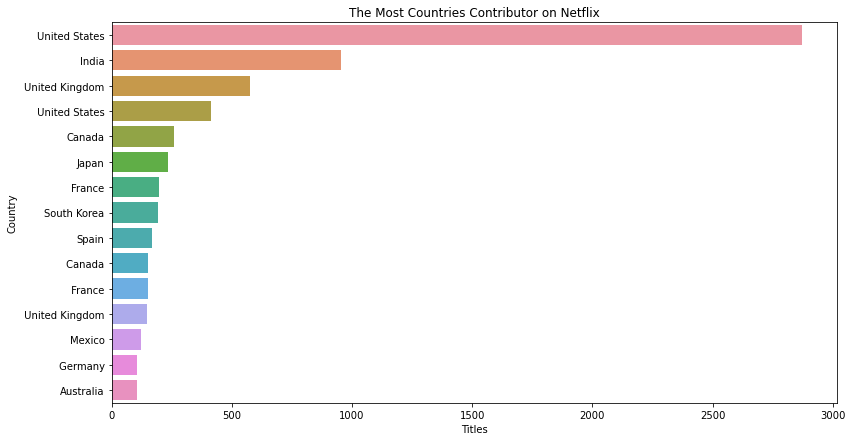

In [6]:
# negara berdasarkan jumlah produksi konten
filtered_countries = df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
filtered_countries = filtered_countries[filtered_countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
g = sns.countplot(y = filtered_countries, order=filtered_countries.value_counts().index[:15])
plt.title('The Most Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

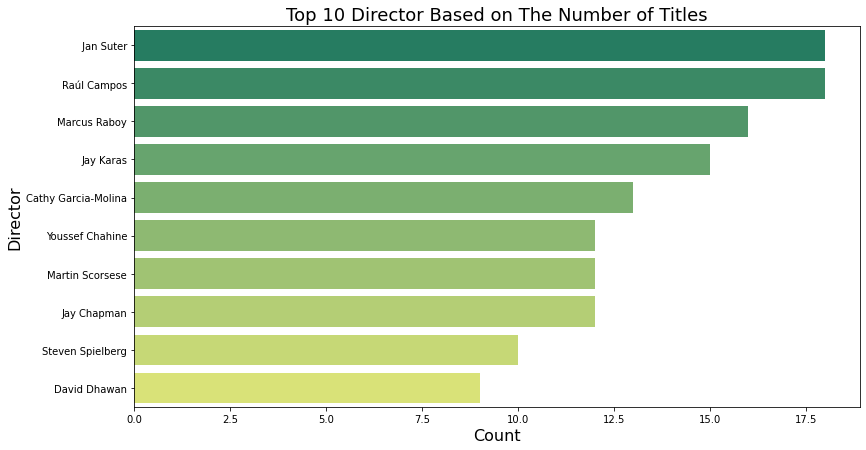

In [7]:
# 10 director terbesar berdasarkan jumlah judul film
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles', fontsize=18)
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='summer')
plt.xlabel('Count', fontsize=16)
plt.ylabel('Director', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Rating Konten Netflix')

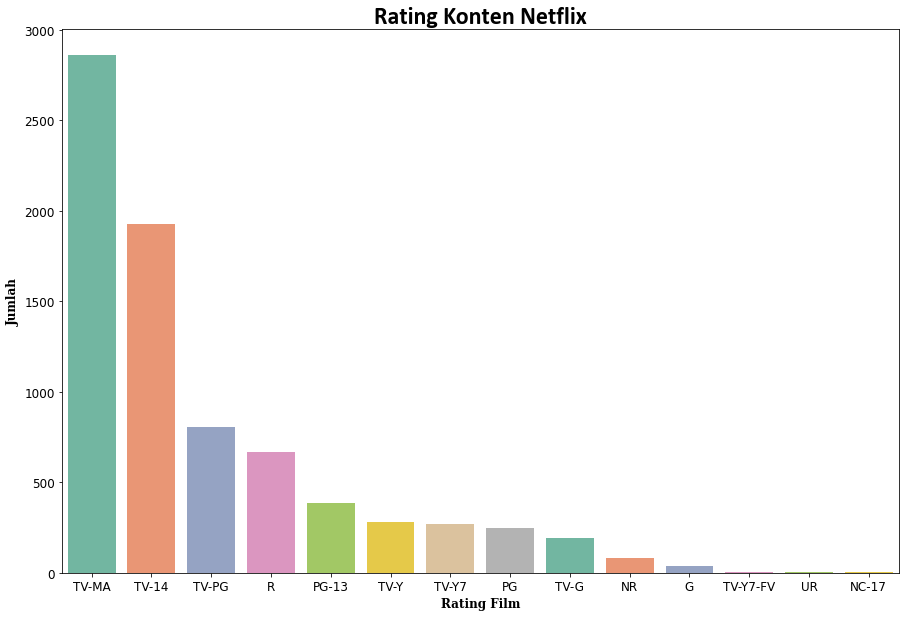

In [8]:
# rating konten netflix
plt.figure(1, figsize=(15,10))
sns.countplot(x='rating', data=df, palette='Set2',order=df['rating'].value_counts().index[0:15])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel ('Rating Film', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel ('Jumlah', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Rating Konten Netflix',fontsize=24, fontfamily='calibri', fontweight='bold' )

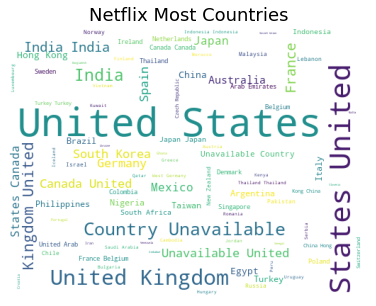

In [9]:
# 10 most common countries in netflix
country = df.country
plt.subplots(figsize=(10,5))
wrdcld = WordCloud(background_color = 'white',
             stopwords = STOPWORDS,
              width = 512,
              height = 384).generate(" ".join(country))
plt.imshow(wrdcld)
plt.axis('off')
plt.title('Netflix Most Countries', fontsize=18)

plt.show()

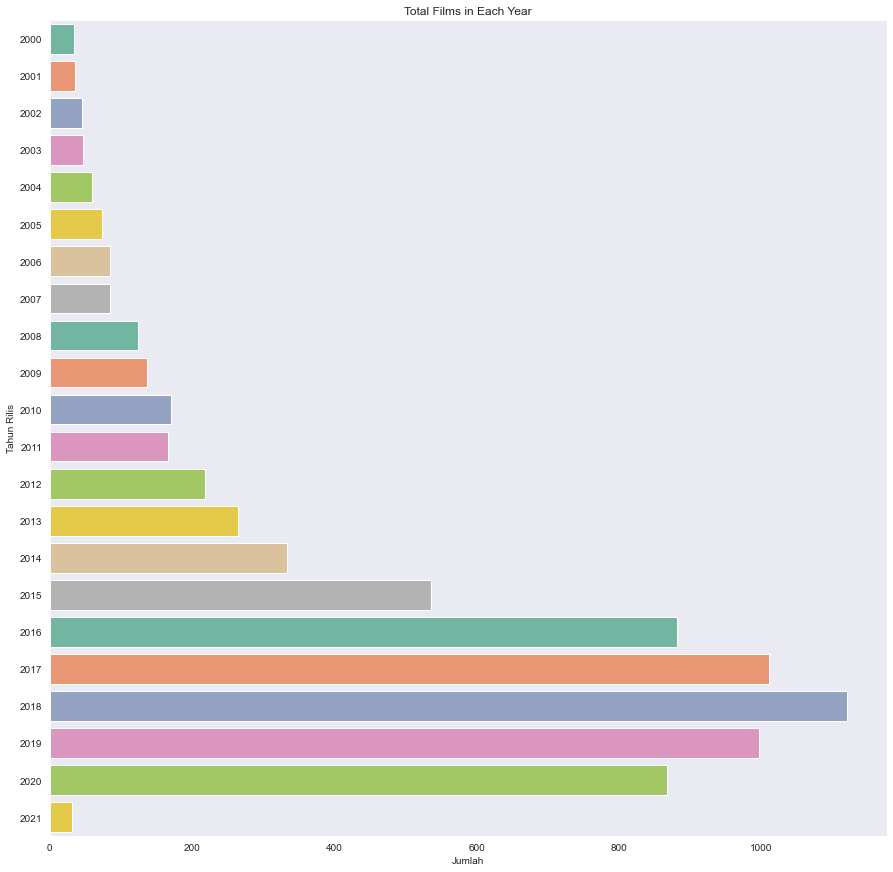

In [10]:
# total film yang rilis tiap tahunnya
data_year = df[df['release_year']>=2000]
plt.figure(1, figsize=(15,15))
sns.set_style('dark')
sns.countplot(y='release_year', data=data_year, palette = 'Set2') #palette itu warna
plt.title('Total Films in Each Year')
plt.xlabel ('Jumlah')
plt.ylabel ('Tahun Rilis')
plt.show()

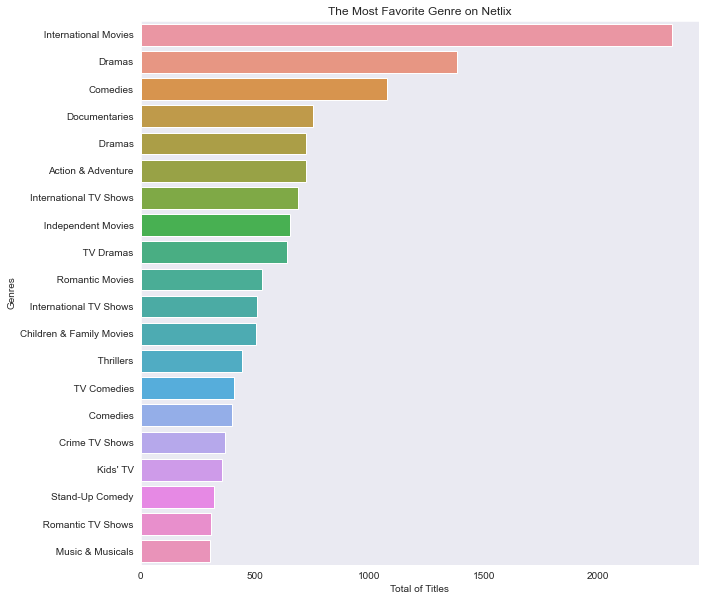

In [11]:
# urutan genre paling favorit
filtered_genres = df.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('The Most Favorite Genre on Netlix')
plt.xlabel('Total of Titles')
plt.ylabel('Genres')
plt.show()

In [12]:
# slice bagian type tv show untuk visualisasi top actor
netflix_show = df[(df['type']=='TV Show')]
netflix_show

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,No Director,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,No Cast,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,No Director,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Country Unavailable,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,No Director,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."
7775,s7776,TV Show,Zoids Wild,No Director,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...
7777,s7778,TV Show,Zombie Dumb,No Director,No Cast,Country Unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7779,s7780,TV Show,Zona Rosa,No Director,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...


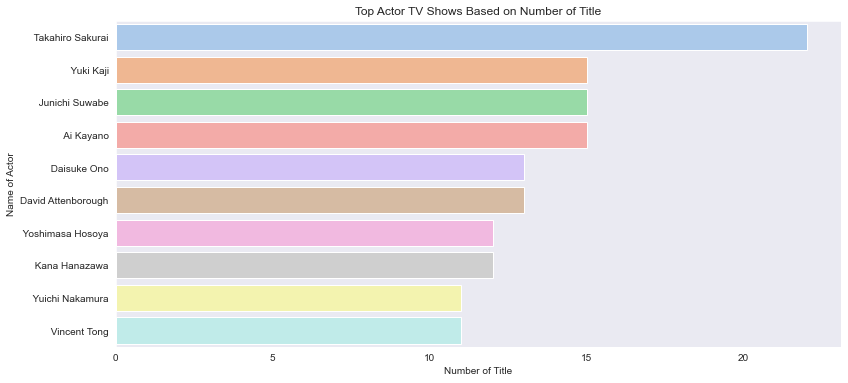

In [13]:
# aktor teratas kategori TV Show berdasarkan jumlah judul aktor
filtered_show = netflix_show[netflix_show.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,6))
plt.title('Top Actor TV Shows Based on Number of Title')
sns.countplot(y = filtered_show, order=filtered_show.value_counts().index[:10],palette='pastel')
plt.xlabel('Number of Title')
plt.ylabel('Name of Actor')
plt.show()

In [14]:
# slice bagian type movies untuk visualisasi top actor
netflix_movie = df[(df['type']=='Movie')]
netflix_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,No Director,Nasty C,Country Unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."


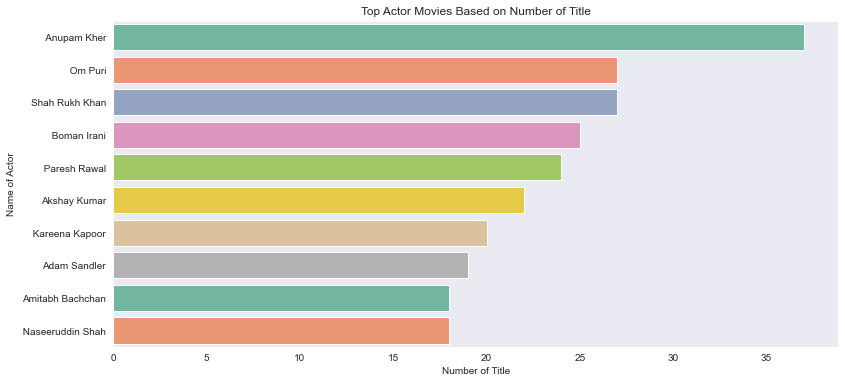

In [15]:
# aktor teratas kategori Movie berdasarkan jumlah judul aktor
filtered_movie = netflix_movie[netflix_movie.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,6))
plt.title('Top Actor Movies Based on Number of Title')
sns.countplot(y = filtered_movie, order=filtered_movie.value_counts().index[:10],palette='Set2')
plt.xlabel('Number of Title')
plt.ylabel('Name of Actor')
plt.show()

Text(0.5, 1.0, 'Durasi Konten Movie Netflix')

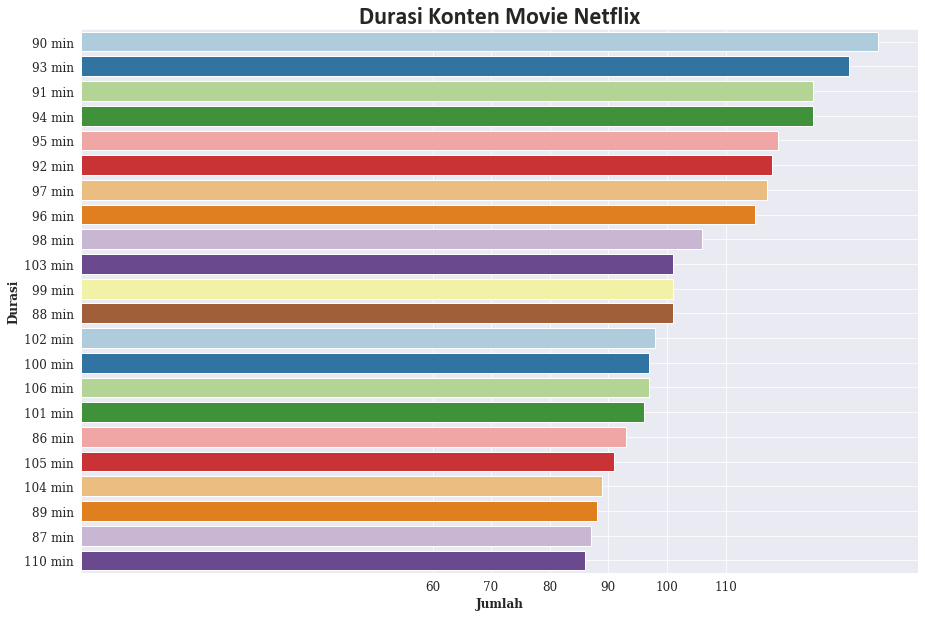

In [16]:
# durasi film kategori movie pada netflix
plt.figure(1, figsize=(15,10))
sns.countplot(y='duration', data=df, palette='Paired', order=df['duration'].value_counts().index[3:25])
sns.set_style('dark')
plt.grid(True)
plt.yticks(fontsize=12, fontfamily='serif')
plt.xticks([60,70,80,90,100,110],fontsize=12, fontfamily='serif')
plt.xlabel ('Jumlah', fontsize=12, fontfamily='serif', fontweight='bold')
plt.ylabel ('Durasi', fontsize=12, fontfamily='serif', fontweight='bold')
plt.title('Durasi Konten Movie Netflix',fontsize=24, fontfamily='calibri', fontweight='bold' )